In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

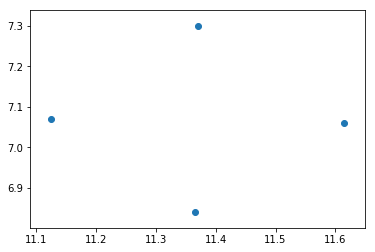

In [5]:
x = [11.615, 11.125, 11.37, 11.365]
y = [7.06, 7.07, 7.3, 6.84]
plt.Circle((12.0,6.8), 0.5, color='r')
plt.scatter(x,y)

In [6]:
plt.Circle((12.0,6.8), 0.5, color='r')

In [7]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt, cm, colors

def calc_R(x,y, xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f(c, x, y):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(x, y, *c)
    return Ri - Ri.mean()

def leastsq_circle(x,y):
    # coordinates of the barycenter
    x_m = np.mean(x)
    y_m = np.mean(y)
    center_estimate = x_m, y_m
    center, ier = optimize.leastsq(f, center_estimate, args=(x,y))
    xc, yc = center
    Ri       = calc_R(x, y, *center)
    R        = Ri.mean()
    residu   = np.sum((Ri - R)**2)
    return xc, yc, R, residu

def plot_data_circle(x,y, xc, yc, R):
    f = plt.figure( facecolor='white', figsize=(12, 8))  #figsize=(7, 5.4), dpi=72,
    plt.axis('equal')

    theta_fit = np.linspace(-np.pi, np.pi, 180)

    x_fit = xc + R*np.cos(theta_fit)
    y_fit = yc + R*np.sin(theta_fit)
    plt.plot(x_fit, y_fit, 'b-' , label="fitted circle", lw=2)
    plt.plot([xc], [yc], 'bD', mec='y', mew=1)
    plt.xlabel('x')
    plt.ylabel('y')   
    # plot data
    plt.scatter(x, y, color='r')

    plt.legend(loc='best',labelspacing=0.1 )
    plt.grid()
    plt.title('Least Squares Circle')

/usr/local/lib/python2.7/dist-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import breadth_first_order, depth_first_order, \
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:169: R

In [11]:
xc, yc, R, residu = leastsq_circle(x,y)
print xc, yc, 2*R

11.370185083825596 7.0698232562424925 0.47512781122661063


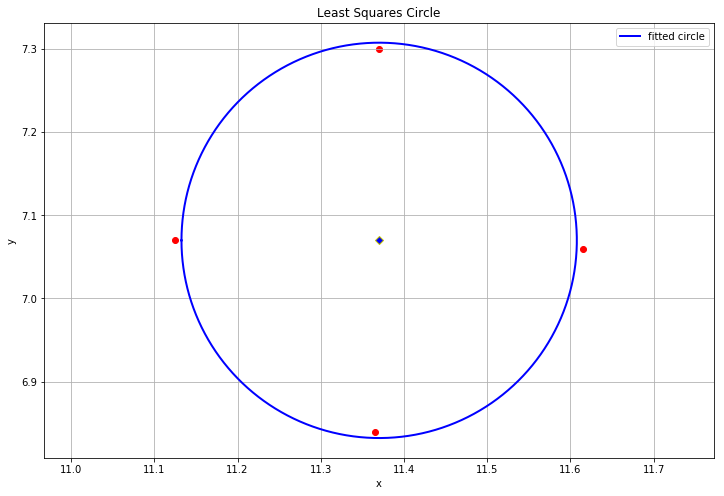

In [9]:
plot_data_circle(x, y, xc, yc, R)